In [2]:
# Subir el archivo de Excel
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [14]:
from google.colab import files
uploaded = files.upload()

# Leer el archivo de Excel
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name, sheet_name=None)


interpolated_data = []


max_time = 0
for sheet_name, df in data.items():
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']
        max_time = max(max_time, df['t'].max())

# Crear un rango de tiempo común (t=0 hasta t_max con paso uniforme)
common_time = np.linspace(0, max_time, 200)

# Interpolar cada hoja al rango común
for sheet_name, df in data.items():
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']
        df['t'] = df['t']
        df['y'] = df['y']
        df['v'] = df['v']

        # Interpolación lineal para y y v
        interp_y = interp1d(df['t'], df['y'], kind='linear', bounds_error=False, fill_value=np.nan)
        interp_v = interp1d(df['t'], df['v'], kind='linear', bounds_error=False, fill_value=np.nan)

        # Evaluar la interpolación en el rango común
        y_interp = interp_y(common_time)
        v_interp = interp_v(common_time)

        # Guardar los datos interpolados
        interpolated_data.append(pd.DataFrame({'t': common_time, 'y': y_interp, 'v': v_interp}))

# Calcular el promedio de las alturas y velocidades
interpolated_df = pd.concat(interpolated_data, axis=1)  # Combina todos los DataFrames
averaged_data = {
    't': common_time,
    'y': np.nanmean([df['y'] for df in interpolated_data], axis=0),
    'v': np.nanmean([df['v'] for df in interpolated_data], axis=0)
}
averaged_df = pd.DataFrame(averaged_data)


output_file = "promedio_experimento.csv"
averaged_df.to_csv(output_file, index=False)
print(f"Archivo exportado como {output_file}")


from google.colab import files
files.download(output_file)


Saving 154ml.xlsx to 154ml.xlsx
Archivo exportado como promedio_experimento.csv


<ipython-input-14-0f1de8823bb9>:45: RuntimeWarning: Mean of empty slice
  'v': np.nanmean([df['v'] for df in interpolated_data], axis=0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Promedios (4).xlsx to Promedios (4) (2).xlsx


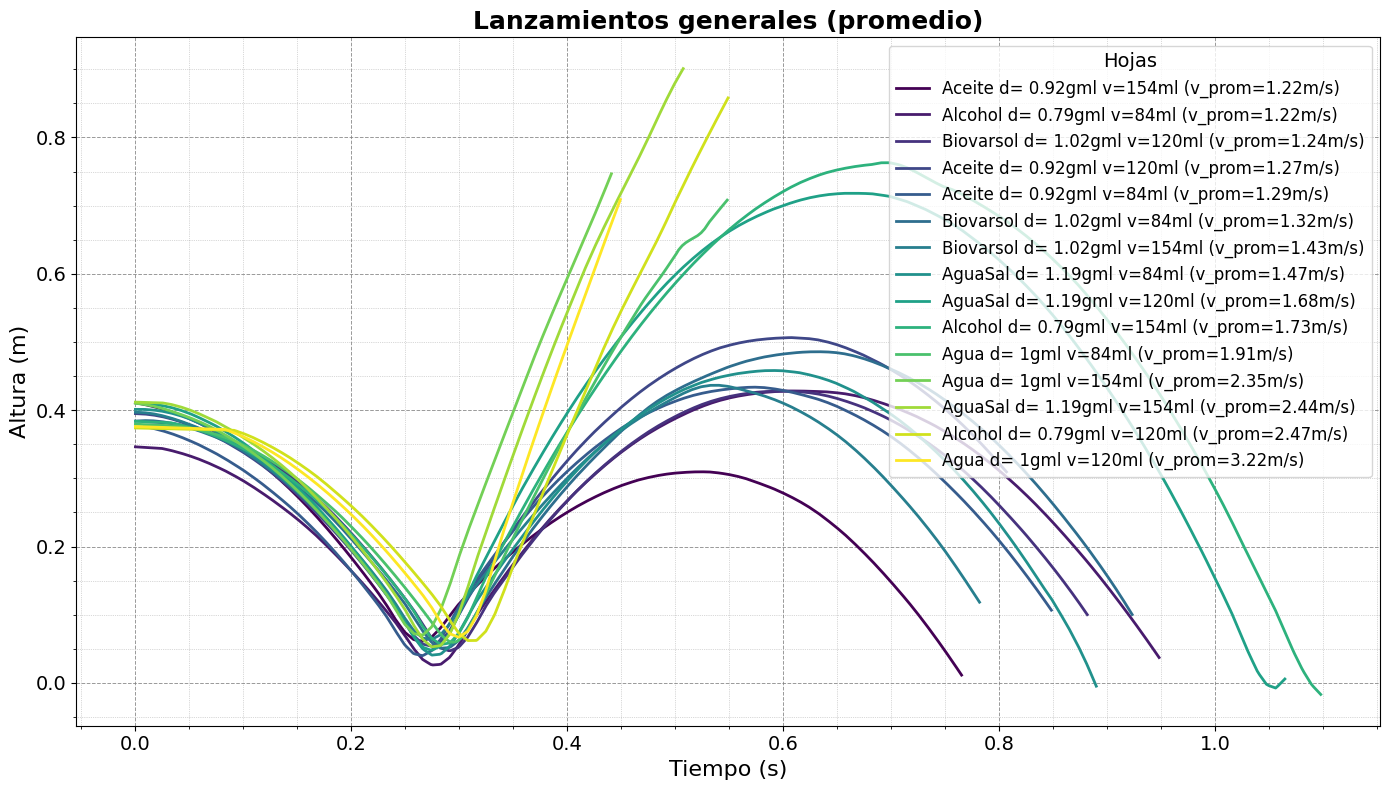

In [26]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]  # Nombre del archivo subido
data = pd.read_excel(file_name, sheet_name=None)  # Leer todas las hojas del archivo

velocities = {}

# Calcular la velocidad promedio de cada hoja
for sheet_name, df in data.items():
    # Verificar si tiene al menos tres columnas
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']
        avg_velocity = df['v'].mean()
        velocities[sheet_name] = avg_velocity

# Ordenar las hojas por velocidad promedio de menor a mayor
sorted_sheets = sorted(velocities, key=velocities.get)

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_sheets)))

# Iterar sobre las hojas ordenadas y graficar con colores asignados
for sheet_name, color in zip(sorted_sheets, colors):
    df = data[sheet_name]
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']

        # Filtro Savitzky-Golay para suavizar los datos
        window_length = 9  # Tamaño de la ventana (ajustar según sea necesario)
        polyorder = 3       # Orden del polinomio para el filtro
        df['y_smooth'] = savgol_filter(df['y'], window_length=window_length, polyorder=polyorder)

        # Interpolación para suavizar la curva en un rango más denso de puntos
        interp = interp1d(df['t'], df['y_smooth'], kind='linear', fill_value="extrapolate")
        t_smooth = np.linspace(df['t'].min(), df['t'].max(), 500)
        y_smooth = interp(t_smooth)

        # Graficar Altura vs Tiempo
        plt.plot(
            t_smooth, y_smooth,
            label=f"{sheet_name} (v_prom={velocities[sheet_name]:.2f}m/s)",
            color=color,
            linewidth=2
        )

# Configuración de la gráfica
plt.title("Lanzamientos generales (promedio)", fontsize=18, fontweight='bold')
plt.xlabel("Tiempo (s)", fontsize=16)
plt.ylabel("Altura (m)", fontsize=16)

# Ajustes de cuadrícula
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.7, alpha=0.8)  # Cuadrícula principal
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5, alpha=0.6)  # Cuadrícula secundaria
plt.minorticks_on()  # Activar marcas secundarias

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Leyenda
plt.legend(title="Hojas", loc='upper right', fontsize=12, title_fontsize=14, frameon=True)

# Ajuste de diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Saving PromediosDensidad (2).xlsx to PromediosDensidad (2) (3).xlsx


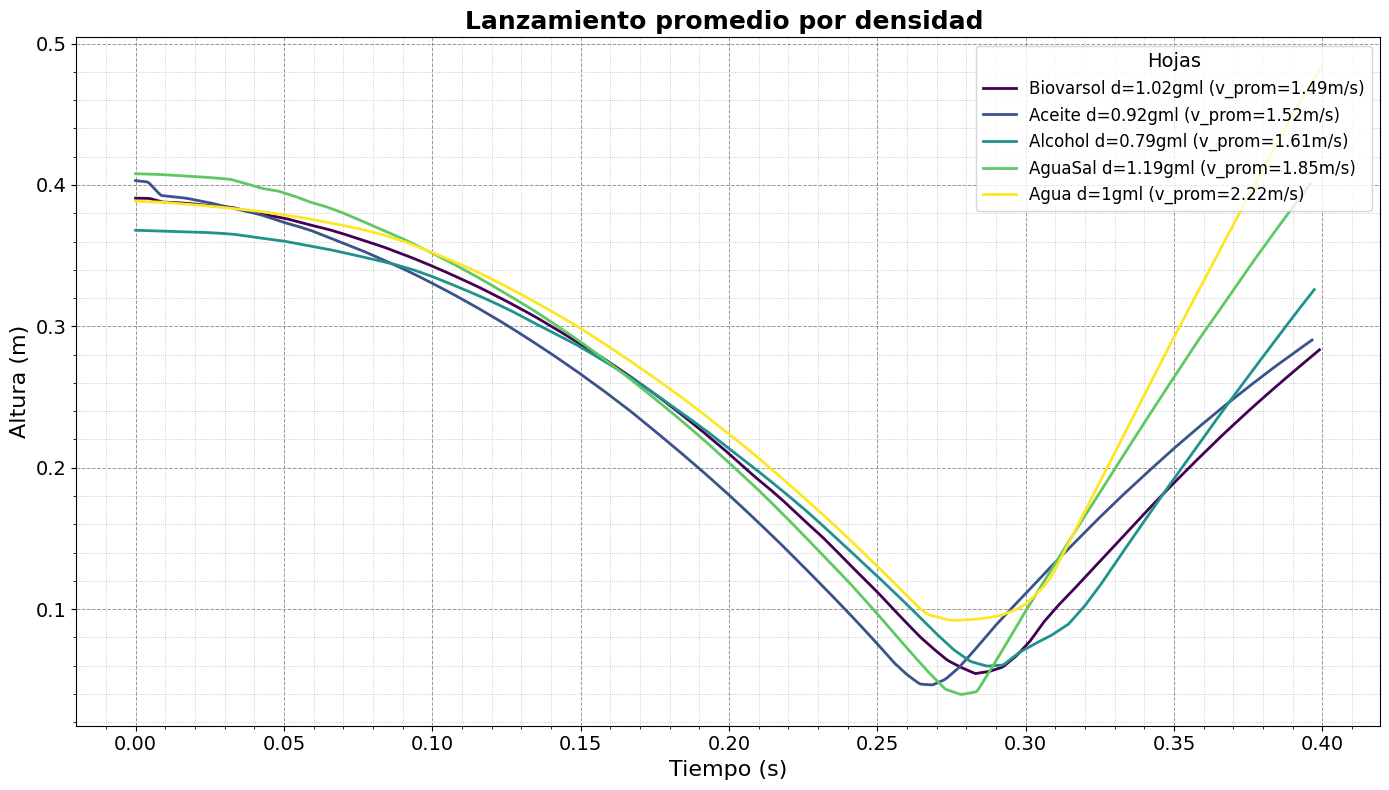

In [25]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]  # Nombre del archivo subido
data = pd.read_excel(file_name, sheet_name=None)  # Leer todas las hojas del archivo

velocities = {}

# Calcular la velocidad promedio de cada hoja
for sheet_name, df in data.items():
    # Verificar si tiene al menos tres columnas
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']
        avg_velocity = df['v'].mean()
        velocities[sheet_name] = avg_velocity

# Ordenar las hojas por velocidad promedio de menor a mayor
sorted_sheets = sorted(velocities, key=velocities.get)

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_sheets)))

# Iterar sobre las hojas ordenadas y graficar con colores asignados
for sheet_name, color in zip(sorted_sheets, colors):
    df = data[sheet_name]
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']

        # Filtro Savitzky-Golay para suavizar los datos
        window_length = 1  # Tamaño de la ventana (ajustar según sea necesario)
        polyorder = 0       # Orden del polinomio para el filtro
        df['y_smooth'] = savgol_filter(df['y'], window_length=window_length, polyorder=polyorder)

        # Interpolación para suavizar la curva en un rango más denso de puntos
        interp = interp1d(df['t'], df['y_smooth'], kind='linear', fill_value="extrapolate")
        t_smooth = np.linspace(df['t'].min(), df['t'].max(), 500)
        y_smooth = interp(t_smooth)

        # Graficar Altura vs Tiempo
        plt.plot(
            t_smooth, y_smooth,
            label=f"{sheet_name} (v_prom={velocities[sheet_name]:.2f}m/s)",
            color=color,
            linewidth=2
        )

# Configuración de la gráfica
plt.title("Lanzamiento promedio por densidad ", fontsize=18, fontweight='bold')
plt.xlabel("Tiempo (s)", fontsize=16)
plt.ylabel("Altura (m)", fontsize=16)

# Ajustes de cuadrícula
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.7, alpha=0.8)  # Cuadrícula principal
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5, alpha=0.6)  # Cuadrícula secundaria
plt.minorticks_on()  # Activar marcas secundarias

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Leyenda
plt.legend(title="Hojas", loc='upper right', fontsize=12, title_fontsize=14, frameon=True)

# Ajuste de diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Saving PromediosVolumen (3).xlsx to PromediosVolumen (3) (2).xlsx


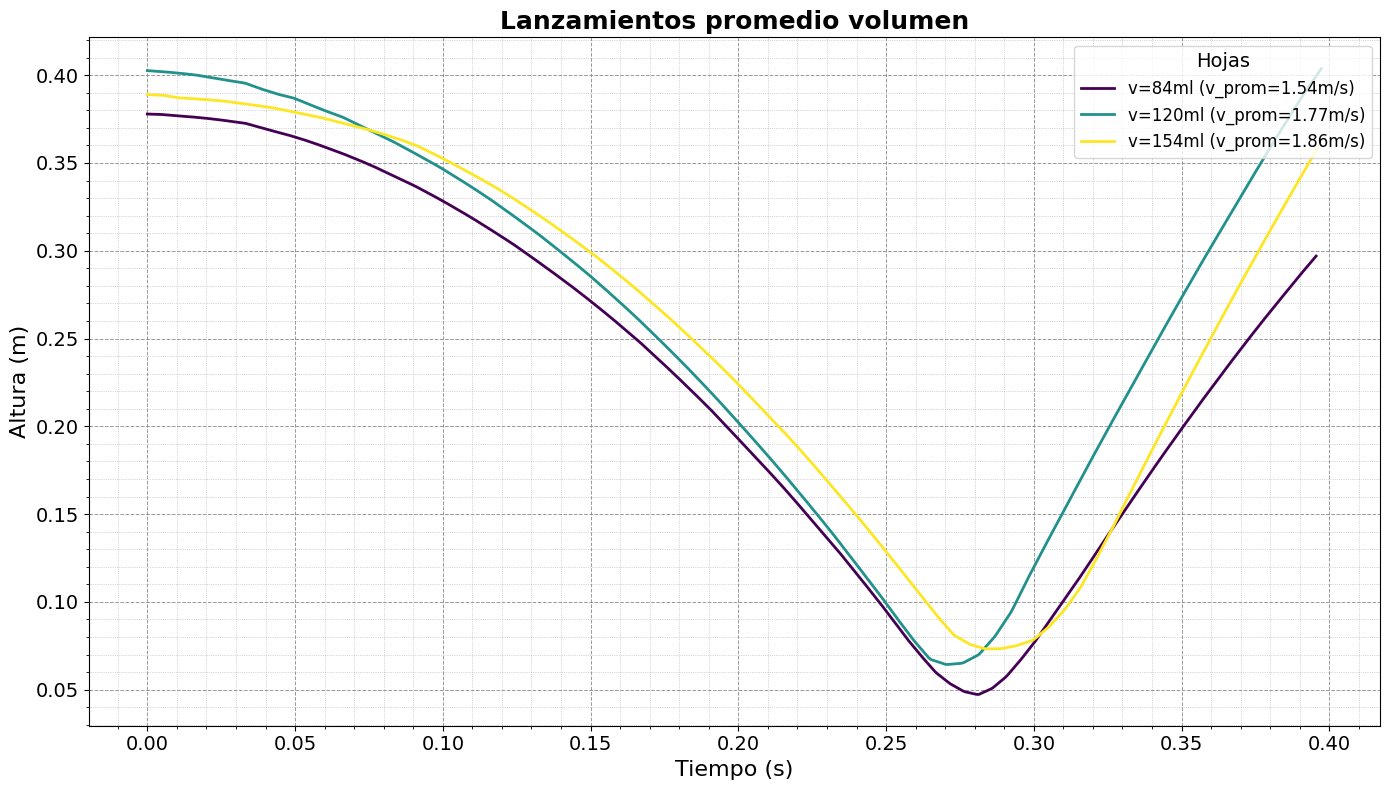

In [24]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]  # Nombre del archivo subido
data = pd.read_excel(file_name, sheet_name=None)  # Leer todas las hojas del archivo

velocities = {}

# Calcular la velocidad promedio de cada hoja
for sheet_name, df in data.items():
    # Verificar si tiene al menos tres columnas
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']
        avg_velocity = df['v'].mean()
        velocities[sheet_name] = avg_velocity

# Ordenar las hojas por velocidad promedio de menor a mayor
sorted_sheets = sorted(velocities, key=velocities.get)

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_sheets)))

# Iterar sobre las hojas ordenadas y graficar con colores asignados
for sheet_name, color in zip(sorted_sheets, colors):
    df = data[sheet_name]
    if df.shape[1] >= 3:
        df.columns = ['t', 'y', 'v']

        # Filtro Savitzky-Golay para suavizar los datos
        window_length = 1  # Tamaño de la ventana (ajustar según sea necesario)
        polyorder = 0       # Orden del polinomio para el filtro
        df['y_smooth'] = savgol_filter(df['y'], window_length=window_length, polyorder=polyorder)

        # Interpolación para suavizar la curva en un rango más denso de puntos
        interp = interp1d(df['t'], df['y_smooth'], kind='linear', fill_value="extrapolate")
        t_smooth = np.linspace(df['t'].min(), df['t'].max(), 500)
        y_smooth = interp(t_smooth)

        # Graficar Altura vs Tiempo
        plt.plot(
            t_smooth, y_smooth,
            label=f"{sheet_name} (v_prom={velocities[sheet_name]:.2f}m/s)",
            color=color,
            linewidth=2
        )

# Configuración de la gráfica
plt.title("Lanzamientos promedio volumen", fontsize=18, fontweight='bold')
plt.xlabel("Tiempo (s)", fontsize=16)
plt.ylabel("Altura (m)", fontsize=16)

# Ajustes de cuadrícula
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.7, alpha=0.8)  # Cuadrícula principal
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5, alpha=0.6)  # Cuadrícula secundaria
plt.minorticks_on()  # Activar marcas secundarias

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Leyenda
plt.legend(title="Hojas", loc='upper right', fontsize=12, title_fontsize=14, frameon=True)

# Ajuste de diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()
